**Tugas 1: Regresi**

Dataframe Head:
    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        HARGA         LT         LB        JKT        JKM        GRS   
1  28000000000       1100        700          5          6        ADA   
2  19000000000        824        800          4          4        ADA   
3   4700000000        500        400          4          3        ADA   
4   4900000000        251        300          5          4        ADA   

  Unnamed: 6  
0       KOTA  
1     JAKSEL  
2     JAKSEL  
3     JAKSEL  
4     JAKSEL  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   object
 1   Unnamed: 1  1002 non-null   object
 2   Unnamed: 2  1002 non-null   object
 3   Unnamed: 3  1002 non-null   object
 4   Unnamed: 4  1002 non-null   object
 5   Unnamed: 5  1002 non-null   object
 6   Unnamed: 6  1002 

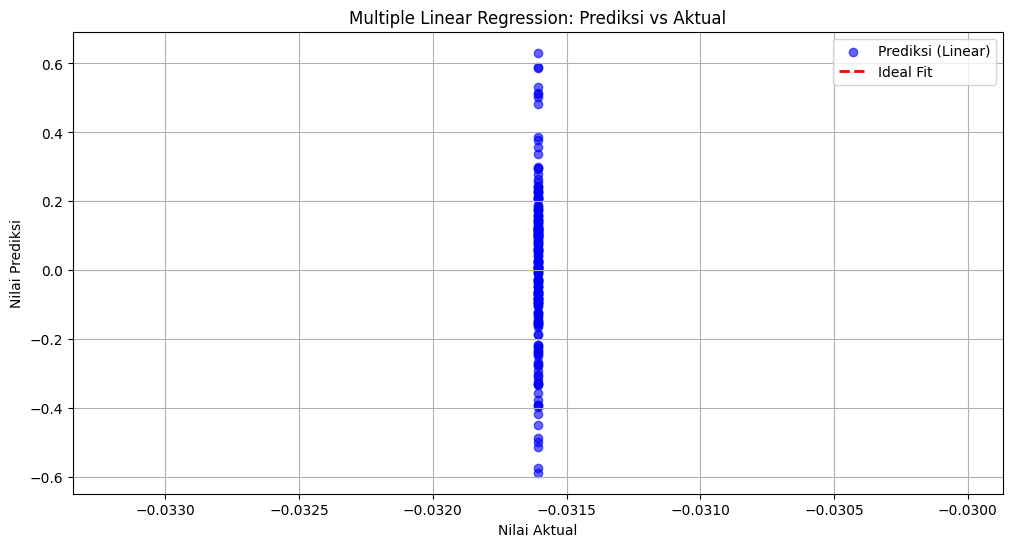

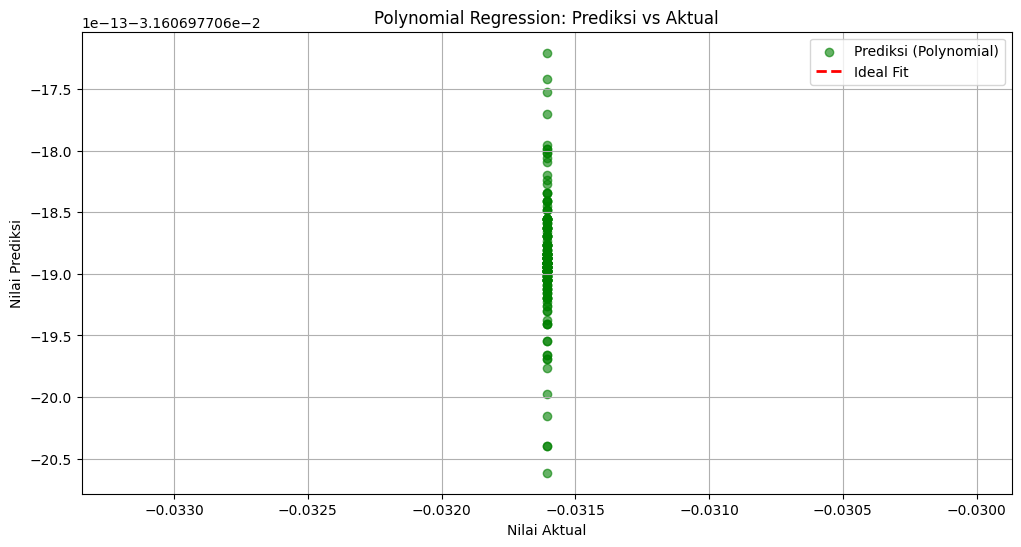

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Tentukan file path
file_path = '/content/harga rumah jaksel.xlsx'  # Ganti dengan path file yang sesuai
df = pd.read_excel(file_path)

print("Dataframe Head:")
print(df.head())
print("\nInfo:")
print(df.info())

#preprocessing
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    # Konversi semua nilai menjadi string untuk menghindari tipe campuran
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\nData setelah transformasi kategorikal:")
print(df.head())


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

print("\nData setelah normalisasi:")
print(df_scaled.head())

X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

#Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

#Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluasi Model: {model_name}")
    print(f"R-squared: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")

#Evaluasi untuk Multiple Linear Regression
evaluate_model(y_test, y_pred_linear, "Multiple Linear Regression")

#Evaluasi untuk Polynomial Regression
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

#Scatter plot untuk Multiple Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Prediksi (Linear)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Fit')
plt.title('Multiple Linear Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()

#Scatter plot untuk Polynomial Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6, label='Prediksi (Polynomial)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Fit')
plt.title('Polynomial Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()


**Tugas 2 Klasifikasi**


Dataset Loaded:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

     Age  SibSp  Parch   Ticket      Fare Cabin Embarked  
0  345.0      0      0   330911   78292.0   NaN        Q  
1   47.0      1      0   363272       7.0   NaN        S  
2   62.0      0      0   240276   96875.0   NaN        Q  
3   27.0      0      0   315154   86625.0   NaN        S  
4   22.0      1      1  3101298  122875.0   NaN        S  

Kolom dalam dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      d

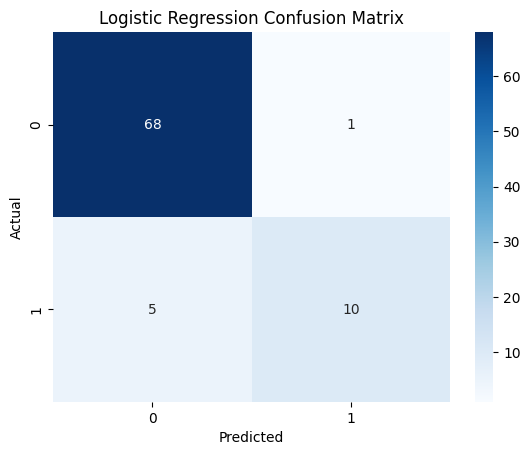


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        69
         1.0       0.91      0.67      0.77        15

    accuracy                           0.93        84
   macro avg       0.92      0.83      0.86        84
weighted avg       0.93      0.93      0.92        84


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.88
Precision: 0.69
Recall: 0.60
F1-Score: 0.64

Confusion Matrix:
[[65  4]
 [ 6  9]]


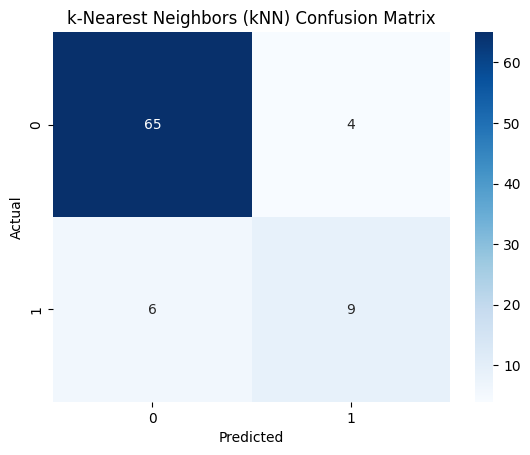


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        69
         1.0       0.69      0.60      0.64        15

    accuracy                           0.88        84
   macro avg       0.80      0.77      0.79        84
weighted avg       0.88      0.88      0.88        84


Support Vector Machine (SVM) Performance:
Accuracy: 0.95
Precision: 0.87
Recall: 0.87
F1-Score: 0.87

Confusion Matrix:
[[67  2]
 [ 2 13]]


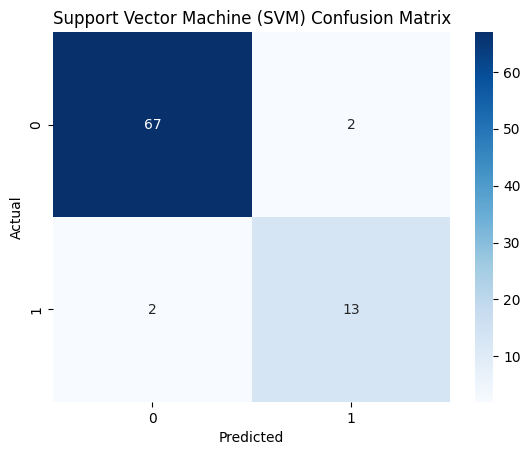


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        69
         1.0       0.87      0.87      0.87        15

    accuracy                           0.95        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.95      0.95      0.95        84



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/test.xlsx'
data = pd.read_excel(file_path)



# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

#Membuat Target Dummy
average_fare = data['Fare'].mean()
data['HighFare'] = (data['Fare'] > average_fare).astype(int)

#Preprocessing Data
#Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

#Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

#Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'HighFare'
X = data.drop(columns=[target_column, 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")



Dataset Loaded:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    Fare Cabin Embarked  
0      0         A/5 21171     725   NaN        S  
1      0          PC 17599  712833   C85        C  
2      0  STON/O2. 3101282    7925   NaN        S  
3      0            113803     531  C123        S  
4      0            373450     805   NaN   

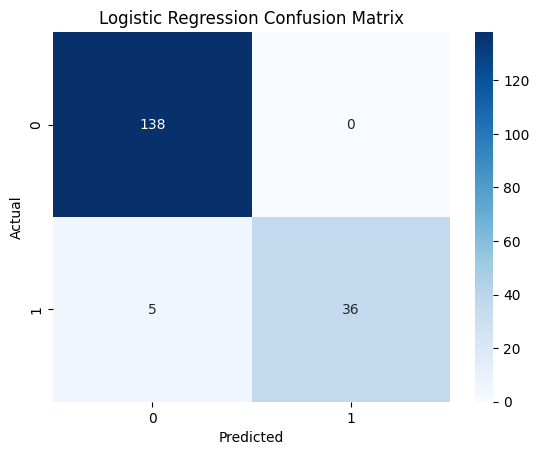


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       138
         1.0       1.00      0.88      0.94        41

    accuracy                           0.97       179
   macro avg       0.98      0.94      0.96       179
weighted avg       0.97      0.97      0.97       179


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.92
Precision: 0.94
Recall: 0.71
F1-Score: 0.81

Confusion Matrix:
[[136   2]
 [ 12  29]]


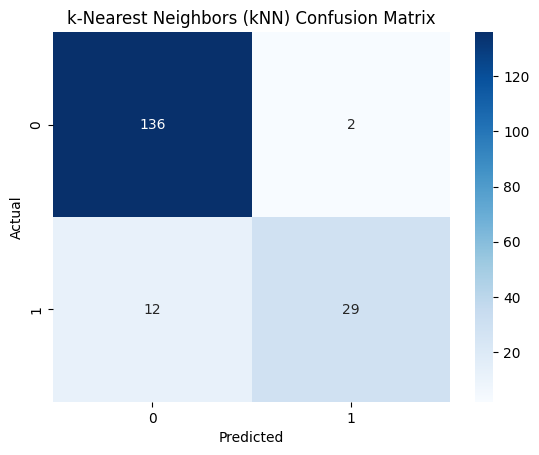


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       138
         1.0       0.94      0.71      0.81        41

    accuracy                           0.92       179
   macro avg       0.93      0.85      0.88       179
weighted avg       0.92      0.92      0.92       179


Support Vector Machine (SVM) Performance:
Accuracy: 0.99
Precision: 0.95
Recall: 1.00
F1-Score: 0.98

Confusion Matrix:
[[136   2]
 [  0  41]]


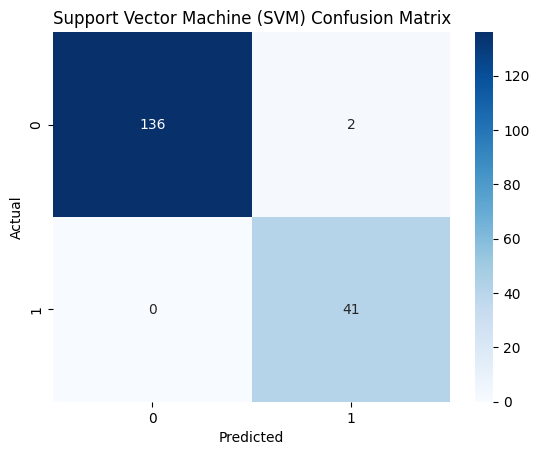


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       138
         1.0       0.95      1.00      0.98        41

    accuracy                           0.99       179
   macro avg       0.98      0.99      0.98       179
weighted avg       0.99      0.99      0.99       179



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/train.xlsx'
data = pd.read_excel(file_path)



# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

#Membuat Target Dummy
average_fare = data['Fare'].mean()
data['HighFare'] = (data['Fare'] > average_fare).astype(int)

#Preprocessing Data
#Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

#Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

#Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'HighFare'
X = data.drop(columns=[target_column, 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")



Dataset Loaded:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Kolom dalam dataset: Index(['PassengerId', 'Survived'], dtype='object')
Dataset berhasil dibagi.

Logistic Regression Performance:
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Confusion Matrix:
[[50  0]
 [34  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


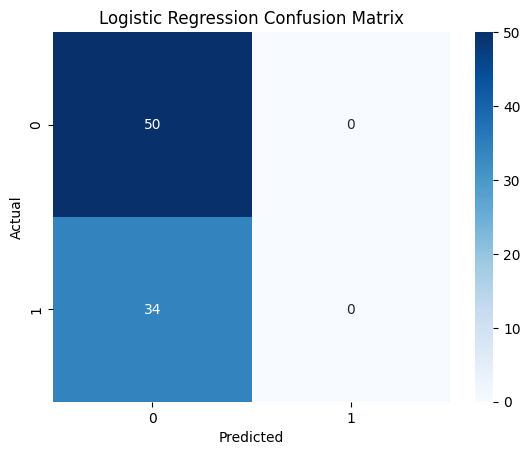


Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Confusion Matrix:
[[50  0]
 [34  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

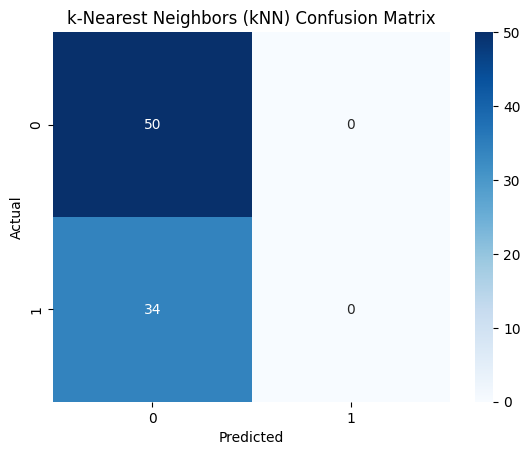


Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84


Support Vector Machine (SVM) Performance:
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Confusion Matrix:
[[50  0]
 [34  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

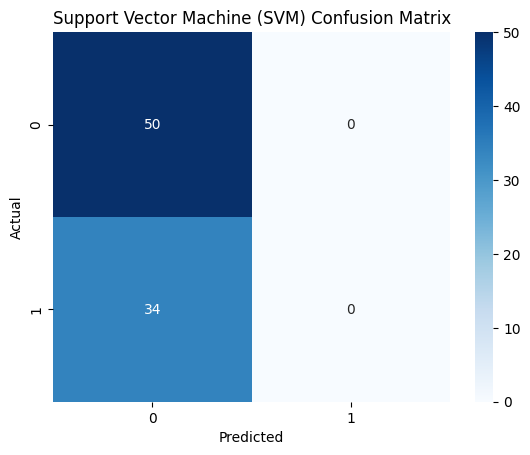


Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/gender_submission.xlsx'
data = pd.read_excel(file_path)

# Display dataset info
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

# Set target variable
target_column = 'Survived'
# Create a dummy feature (not meaningful)
data['DummyFeature'] = 1  # Add a constant feature

# Prepare features and target
X = data[['DummyFeature']]  # Use the dummy feature as input
y = data[target_column]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standardize data (though not necessary for a constant feature)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model and Evaluation
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")